In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

def displayMatrixCorr(df, val_manquante = None, bigSize = False):
    # Filtrer les colonnes ayant moins de 400 valeurs manquantes
    if val_manquante == None :
        corr_matrix = df.corr()
    else :
        filtered_df = df.loc[:, df.isnull().sum() < val_manquante]
    
        # Calculer la matrice de corrélation
        corr_matrix = filtered_df.corr()
    
    # Afficher la matrice de corrélation
    if bigSize :
        plt.figure(figsize=(24, 20))
    else :
        plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Matrice de corrélation")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


script_dir = Path.cwd() 

df = pd.read_csv(script_dir.parent / '4 - Dataset' / "prepoAvecWeldID.csv")
df_reg = pd.read_csv(script_dir.parent / '4 - Dataset' / "regression_weld_data_noOutliers.csv")

In [50]:
L_targets = [
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 'Elongation (%)',
    'Reduction of Area (%)', 
] #'Hardness (kg/mm2)' , 'Charpy impact toughness (J)', 'Charpy temperature (deg C)'

ys = df_reg[L_targets]
print(ys.shape) 
ys = ys.drop_duplicates() 
print(ys.shape)

(1324, 4)
(667, 4)


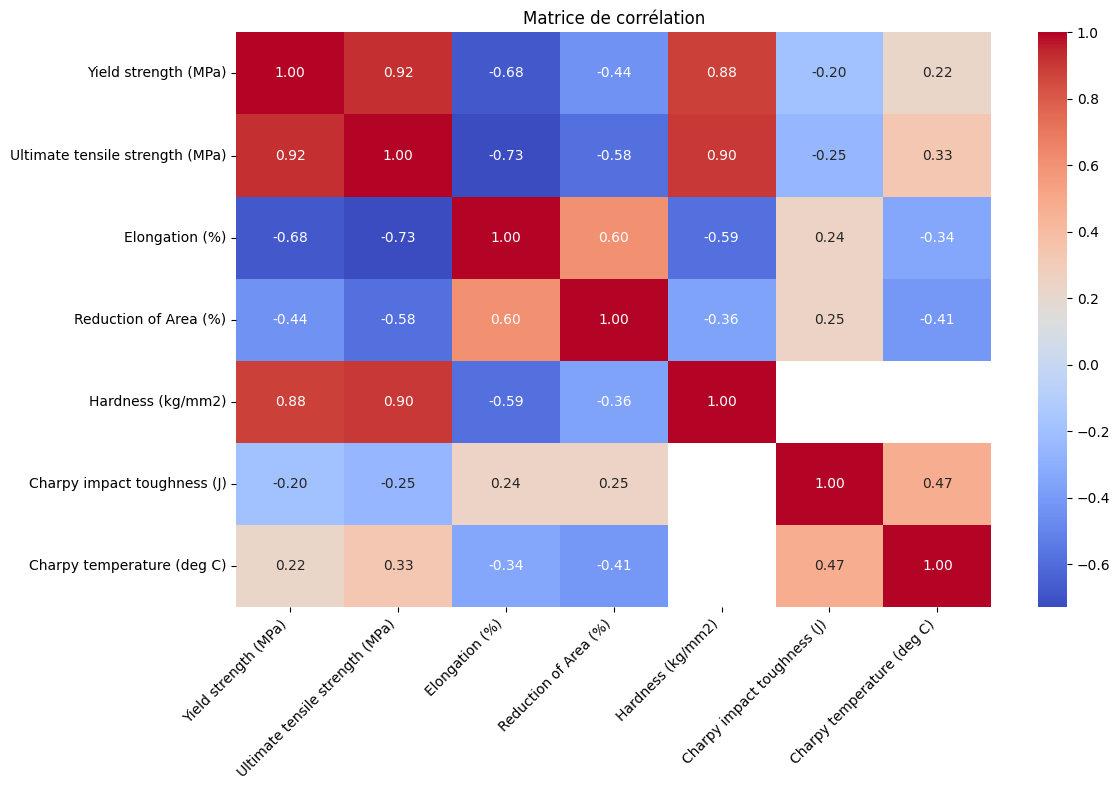

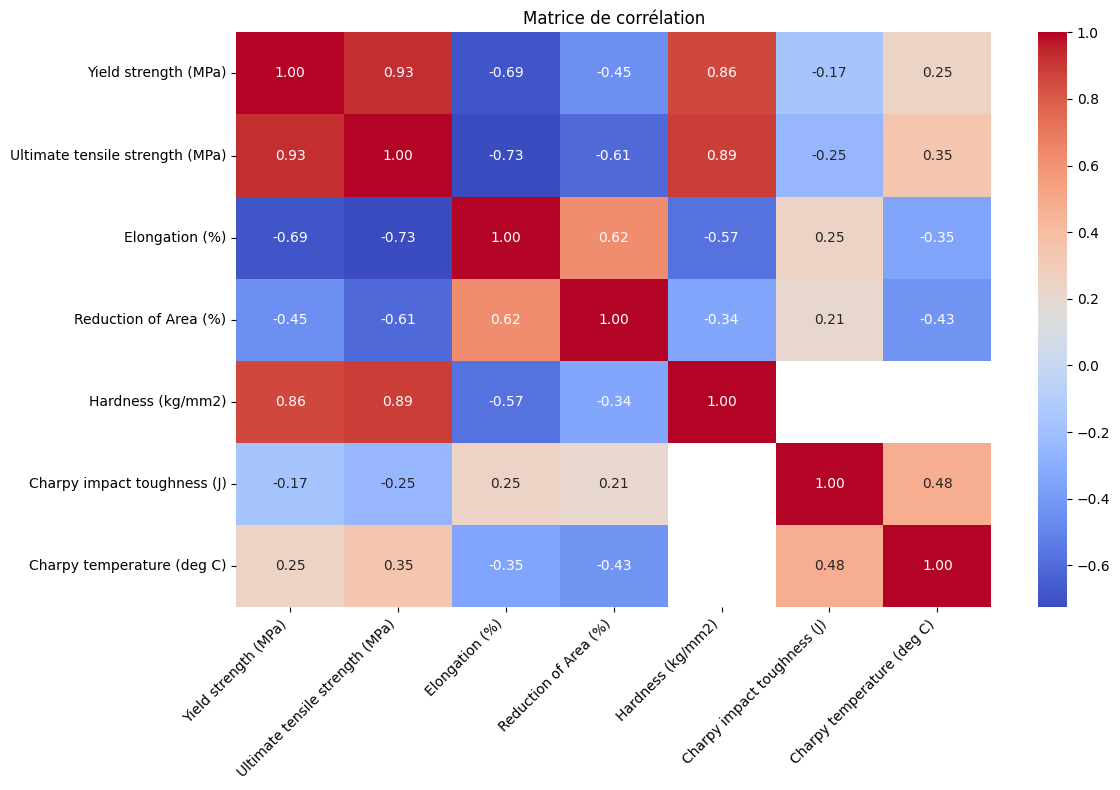

In [49]:
displayMatrixCorr(df[[
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 'Elongation (%)',
    'Reduction of Area (%)', 'Hardness (kg/mm2)' , 'Charpy impact toughness (J)', 'Charpy temperature (deg C)']])
displayMatrixCorr(df_reg[[
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 'Elongation (%)',
    'Reduction of Area (%)', 'Hardness (kg/mm2)' , 'Charpy impact toughness (J)', 'Charpy temperature (deg C)']])

In [51]:
ys_noNaN = ys.dropna()
print(ys_noNaN.shape)

(553, 4)


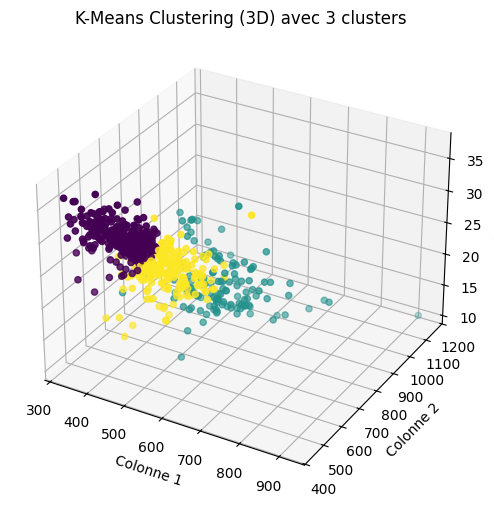

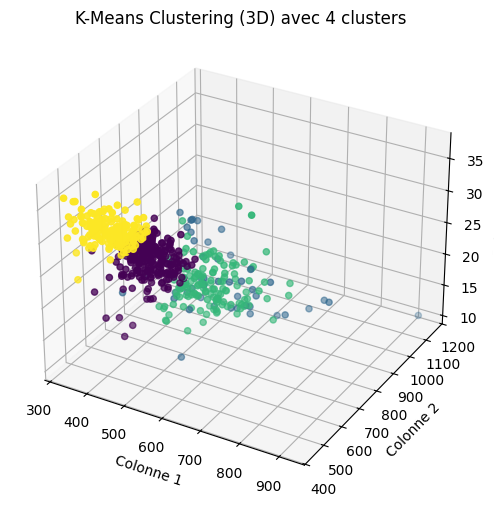

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Fonction K-Means avec visualisation 2D et 3D
def k_means_clustering_visualize(ys1, n_clusters=3, plot_3d=True):
    """
    Applique K-Means sur un dataset et affiche les clusters en 2D ou 3D.
    
    Paramètres:
    ys : DataFrame pandas, contenant 4 colonnes de données
    n_clusters : nombre de clusters à former
    plot_3d : booléen, si True affiche le graphique en 3D, sinon en 2D
    
    Retourne:
    Un DataFrame avec les labels des clusters ajoutés et les graphiques.
    """
    ys = ys1.copy()
    # Standardisation des données (important pour K-Means si les échelles sont différentes)
    scaler = StandardScaler()
    ys_scaled = scaler.fit_transform(ys)
    
    # Application du clustering K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    ys['cluster'] = kmeans.fit_predict(ys_scaled)
    
    # Affichage des résultats
    if plot_3d:
        # Visualisation en 3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(ys.iloc[:, 0], ys.iloc[:, 1], ys.iloc[:, 2], c=ys['cluster'], cmap='viridis', marker='o')
        
        ax.set_xlabel('Colonne 1')
        ax.set_ylabel('Colonne 2')
        ax.set_zlabel('Colonne 3')
        plt.title(f'K-Means Clustering (3D) avec {n_clusters} clusters')
        plt.show()
    
    else:
        # Visualisation en 2D avec trois graphiques sur la même ligne
        plt.figure(figsize=(18, 6))  # Taille de la figure ajustée pour bien espacer les graphes

        # Premier graphique : colonne 1 en X, colonne 2 en Y
        plt.subplot(1, 3, 1)  # 1 ligne, 3 colonnes, 1er graphique
        plt.scatter(ys.iloc[:, 0], ys.iloc[:, 1], c=ys['cluster'], cmap='viridis', marker='o')
        plt.xlabel('Colonne 1')
        plt.ylabel('Colonne 2')
        plt.title(f'K-Means Clustering avec {n_clusters} clusters (Col 1 vs Col 2)')

        # Deuxième graphique : colonne 1 en X, colonne 3 en Y
        plt.subplot(1, 3, 2)  # 1 ligne, 3 colonnes, 2ème graphique
        plt.scatter(ys.iloc[:, 0], ys.iloc[:, 2], c=ys['cluster'], cmap='viridis', marker='o')
        plt.xlabel('Colonne 1')
        plt.ylabel('Colonne 3')
        plt.title(f'K-Means Clustering avec {n_clusters} clusters (Col 1 vs Col 3)')

        # Troisième graphique : colonne 1 en X, colonne 4 en Y
        plt.subplot(1, 3, 3)  # 1 ligne, 3 colonnes, 3ème graphique
        plt.scatter(ys.iloc[:, 0], ys.iloc[:, 3], c=ys['cluster'], cmap='viridis', marker='o')
        plt.xlabel('Colonne 1')
        plt.ylabel('Colonne 4')
        plt.title(f'K-Means Clustering avec {n_clusters} clusters (Col 1 vs Col 4)')

        # Ajustement de l'espacement entre les graphiques pour qu'ils ne se chevauchent pas
        plt.tight_layout()

        # Affichage des trois graphiques
        plt.show()
    
    return ys

result_df_3 = k_means_clustering_visualize(ys_noNaN, n_clusters=3, plot_3d=True)
result_df_4 = k_means_clustering_visualize(ys_noNaN, n_clusters=4, plot_3d=True)

In [32]:
result_df_3.tail(10)

,Yield strength (MPa),Ultimate tensile strength (MPa),Elongation (%),Reduction of Area (%),cluster
1448,604.0,680.0,20.0,71.9,3
1450,560.0,600.0,25.0,77.0,0
1452,596.0,642.0,21.0,74.0,3
1454,650.0,720.0,20.0,70.8,3
1456,624.0,672.0,20.0,73.0,3
1458,650.0,710.0,18.4,73.0,3
1460,706.0,772.0,16.0,67.5,3
1462,495.0,557.0,27.6,78.9,0
1464,487.0,563.0,27.4,77.4,0
1466,570.0,625.0,25.8,75.0,0


In [74]:
def generate_cluster_datasets_and_stats(df, cluster_column='cluster'):
    """
    Sépare un DataFrame en n datasets basés sur le cluster et affiche les statistiques pour chaque cluster.
    
    Paramètres :
    df : DataFrame pandas contenant les données avec une colonne de cluster
    cluster_column : le nom de la colonne contenant les labels de cluster (par défaut 'cluster')
    
    Retourne :
    Une liste de DataFrames, chacun contenant les données d'un cluster, ainsi que les statistiques affichées pour chaque cluster.
    """
    # Initialiser une liste pour stocker les datasets par cluster
    cluster_datasets = []
    
    # Obtenir la liste des clusters uniques
    clusters = df[cluster_column].unique()
    
    # Boucler sur chaque cluster et calculer les statistiques
    for cluster in clusters:
        # Filtrer les lignes appartenant à ce cluster
        cluster_data = df[df[cluster_column] == cluster]
        
        # Ajouter ce dataset à la liste
        cluster_datasets.append(cluster_data)
        
        # Calculer les statistiques : moyenne, variance, écart-type, médiane pour chaque colonne
        stats = cluster_data.describe().T[['mean', '50%', 'std']]  # "50%" correspond à la médiane dans pandas
        stats['variance'] = cluster_data.var()

        # Afficher les statistiques pour ce cluster
        print(f"\nStatistiques pour le Cluster {cluster}:")
        print(stats[['mean', 'std', 'variance', '50%']])
    
    return cluster_datasets



cluster_datasets = generate_cluster_datasets_and_stats(result_df_3)



Statistiques pour le Cluster 0:
                                       mean        std     variance    50%
Yield strength (MPa)             432.349793  40.926417  1674.971594  437.0
Ultimate tensile strength (MPa)  520.748963  32.403598  1049.993176  524.0
Elongation (%)                    30.390871   2.392732     5.725166   30.4
Reduction of Area (%)             77.575104   3.676021    13.513128   78.6
cluster                            0.000000   0.000000     0.000000    0.0

Statistiques pour le Cluster 2:
                                       mean        std     variance     50%
Yield strength (MPa)             516.522632  42.945113  1844.282713  514.00
Ultimate tensile strength (MPa)  601.228421  37.953850  1440.494744  598.50
Elongation (%)                    24.574737   2.976894     8.861898   25.00
Reduction of Area (%)             73.173158   4.773557    22.786842   74.25
cluster                            2.000000   0.000000     0.000000    2.00

Statistiques pour le Cluste

In [61]:
cluster_mapping = {
        0: 'MoindreResistance/MeilleurDuctilite',
        1: 'MeilleirResistance/MoindreDuctilite',
        2: 'ResistanceIntermediaire/DuctiliteIntermediaire'
    }
    
# Remplacement des valeurs de la colonne 'cluster'
result_clustering_with_name = result_df_3.copy()
result_clustering_with_name['cluster'] = result_df_3['cluster'].replace(cluster_mapping)

In [75]:
index_valides = result_clustering_with_name.index
df_filtré = df_reg.loc[index_valides]
colonnes_manquantes = ['AC or DC', 'Aluminium concentration (%)', 'Boron concentration (%)',
       'Carbon concentration (weight%)', 'Chromium concentration (weight%)',
       'Copper concentration (weight%)', 'Current (A)',
       'Electrode positive or negative', 'Heat input (kJ/mm)',
       'Interpass temperature (deg C)', 'Manganese concentration (weight%)',
       'Molybdenum concentration (weight%)', 'Nickel concentration (weight%)',
       'Niobium concentration (%)', 'Nitrogen concentration (%)',
       'Oxygen concentration (%)', 'Phosphorus concentration (weight%)',
       'Post weld heat treatment temperature (deg C)',
       'Post weld heat treatment time (hours)',
       'Silicon concentration (weight%)', 'Sulphur concentration (weight%)',
       'Titanium concentration (%)', 'Type of weld',
       'Vanadium concentration (weight%)', 'Voltage (V)']
colonnes_manquantes_df = df_filtré[colonnes_manquantes]
cluster = result_clustering_with_name['cluster']
final_df = pd.concat([colonnes_manquantes_df, cluster], axis=1)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 0 to 1313
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   AC or DC                                      553 non-null    float64
 1   Aluminium concentration (%)                   553 non-null    float64
 2   Boron concentration (%)                       553 non-null    float64
 3   Carbon concentration (weight%)                553 non-null    float64
 4   Chromium concentration (weight%)              553 non-null    float64
 5   Copper concentration (weight%)                553 non-null    float64
 6   Current (A)                                   553 non-null    float64
 7   Electrode positive or negative                553 non-null    float64
 8   Heat input (kJ/mm)                            553 non-null    float64
 9   Interpass temperature (deg C)                 553 non-null    float64

In [71]:
final_df.to_csv(script_dir.parent / '4 - Dataset' / "dataset_classification.csv", index=False)

In [86]:
df_chemiCluster = pd.concat([colonnes_manquantes_df.iloc[:,6:10], result_df_3['cluster']], axis=1)
a=generate_cluster_datasets_and_stats(df_chemiCluster, cluster_column='cluster')


Statistiques pour le Cluster 0:
                                      mean         std      variance    50%
Current (A)                     239.522822  163.358248  26685.917185  170.0
Electrode positive or negative    0.929461    0.256587      0.065837    1.0
Heat input (kJ/mm)                1.467365    0.949762      0.902049    1.0
Interpass temperature (deg C)   204.771784   33.116741   1096.718534  200.0
cluster                           0.000000    0.000000      0.000000    0.0

Statistiques pour le Cluster 2:
                                      mean         std      variance    50%
Current (A)                     219.526316  138.275612  19120.144806  170.0
Electrode positive or negative    0.952632    0.313486      0.098273    1.0
Heat input (kJ/mm)                1.431000    0.848217      0.719472    1.0
Interpass temperature (deg C)   197.142105   44.312930   1963.635784  200.0
cluster                           2.000000    0.000000      0.000000    2.0

Statistiques pour le 